<h2 style="background-color:salmon;border-radius:5px;text-align:center;padding:15px;color:white;">AI Technology Assignment - Part 1</h2>
<h4>Done by: TEY JIA YING (2027074D)<br><br>Module Code: IT3312</h4>

<h1 style="background-color:lightpink;border-radius:5px;text-align:center;padding:7px;color:white;">Overview of Part 1</h1>

<h3>Overview:</h3>
I have structured the project into 5 key sections. Below, I will share with you the steps I took together with insights for each section.

1. [Importing Input Data](#1)
<br><br>
2. [Basic Pre-processing of Input Data](#2)<br>
<br>
3. [Basic Understanding of Input Data](#3)<br>
 <br>   
4. [Exploratory Data Understanding of Input Data](#4)<br>
<br>
5. [Data Preparation of Input Data](#5)
<br><br>
6. [Derive black and white images from original color images](#6)<br>
    6.1.  [Import cifar-10 original colored images](#61)<br>
    6.2 [Preprocess cifar-10 original colored images](#62)<br>
    6.3 [Import cifar-10 original colored images](#63)<br>
    6.4 [Data Preparation - Convert the first 50 cifar-10 colored training images to black & white using Python Imaging Library](#64))<br>
    6.5 [Data Verification - Verify the black and white values are identical to input dataset (black white images)](#65))<br>


**<b>Note: Click on the links to go to the respective section</b>**

In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from six.moves import cPickle 
import tensorflow as tf
import tensorflow.keras as keras
from keras.datasets import cifar10
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize
import matplotlib.image as mpimg
from PIL import ImageFont, Image
import cv2
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report
import itertools

%matplotlib inline

<a id='1'><h1 style="background-color:lightpink;border-radius:5px;text-align:center;padding:7px;color:white;">1. Importing Input Data</h2></a>

In [2]:
test_batch1=pd.read_pickle("IT3312/test_batch1.pkl")

train_batch1=pd.read_pickle("IT3312/train_batch1.pkl")
train_batch2=pd.read_pickle("IT3312/train_batch2.pkl")
train_batch3=pd.read_pickle("IT3312/train_batch3.pkl")
train_batch4=pd.read_pickle("IT3312/train_batch4.pkl")
train_batch5=pd.read_pickle("IT3312/train_batch5.pkl")

<a id='2'><h1 style="background-color:lightpink;border-radius:5px;text-align:center;padding:7px;color:white;">2. Basic Pre-processing Input Data</h2>

As mentioned in the official website , the CIFAR-10 dataset consists of 5 batches, named data_batch_1, data_batch_2, etc. Hence, let's concat the training data into one single data frame as one training batch

In [3]:
train_data=pd.concat([train_batch1,train_batch2,train_batch3,train_batch4,train_batch5])

In [4]:
test_data=test_batch1

Lets prepare the training and testing data for EDA and model training later

In [5]:
X_train=train_data.iloc[:,:-1]
y_train=train_data['label']

X_test=test_data.iloc[:,:-1]
y_test=test_data['label']

Before we start data understanding, lets concat the training and testing data together to form a full dataframem

In [6]:
data=pd.concat([train_data,test_data])

<a id='3'><h1 style="background-color:lightpink;border-radius:5px;text-align:center;padding:7px;color:white;">3. Basic Data Understanding of Input Data</h2>

In [7]:
data

0    1    2    3    4    5    6    7    8    9  ...  1015  1016  1017  \
0      61   45   48   57   78   96  113  117  123  126  ...    96   103    94   
1     171  134  103  101  130  164  187  195  152  116  ...    46    66    91   
2     255  253  253  253  253  253  253  253  253  253  ...    79    76    65   
3      24   33   34   37   39   36   37   22   26   31  ...    65    81    67   
4     179  177  185  192  194  192  194  193  193  193  ...    84    81    78   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
9995   84   84   85   85   84   86   86   86   87   89  ...   168   158   205   
9996   63   74   81   86   90   95   93   98  102  110  ...   146   150   155   
9997   16   15   14   14   13   12   11   10    9    8  ...   118    59    28   
9998   32   26   33   23   24   48   71   87  110  133  ...   121   120   121   
9999   76  103  105   82   63  153  225  186  132  226  ...   105   105   104   

      1018  1019  1020  1021  1022  1023  label  
0       72    83   145   189   124    99      6  
1      115   130   134   137   138   137      9  
2       62    68    76    83    83    84      9  
3       75    75    58    47    56    65      4  
4       79    75    74    78    74    76      1  
...    ...   ...   ...   ...   ...   ...    ...  
9995   226   230   221   216   213   213      8  
9996   156   158   179   143   166   164      3  
9997    29    28    27    26    27    25      5  
9998   114   112   110   110   110   107      1  
9999   112   111   109   113    65    26      7  

[60000 rows x 1025 columns]

In [8]:
data.shape

(60000, 1025)

## 3.1 Understanding the structure of data

As shown in the shape of the data, the data set consist of 60000 rows which would refer to 60000 images. Each row has 1025 where the first 1024 is the matrix of the image and the last row is named as the label of the image

Hence, lets convert the data to X as the images dataframe and Y as the label dataframe

In [9]:
X=data.iloc[:,:-1]
y=data['label']
print(X.shape,y.shape)

(60000, 1024) (60000,)


In [10]:
X

0     1     2     3     4     5     6     7     8     9     ...  1014  \
0       61    45    48    57    78    96   113   117   123   126  ...    93   
1      171   134   103   101   130   164   187   195   152   116  ...    23   
2      255   253   253   253   253   253   253   253   253   253  ...    74   
3       24    33    34    37    39    36    37    22    26    31  ...    81   
4      179   177   185   192   194   192   194   193   193   193  ...    88   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
9995    84    84    85    85    84    86    86    86    87    89  ...   214   
9996    63    74    81    86    90    95    93    98   102   110  ...   158   
9997    16    15    14    14    13    12    11    10     9     8  ...   123   
9998    32    26    33    23    24    48    71    87   110   133  ...   124   
9999    76   103   105    82    63   153   225   186   132   226  ...   100   

      1015  1016  1017  1018  1019  1020  1021  1022  1023  
0       96   103    94    72    83   145   189   124    99  
1       46    66    91   115   130   134   137   138   137  
2       79    76    65    62    68    76    83    83    84  
3       65    81    67    75    75    58    47    56    65  
4       84    81    78    79    75    74    78    74    76  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
9995   168   158   205   226   230   221   216   213   213  
9996   146   150   155   156   158   179   143   166   164  
9997   118    59    28    29    28    27    26    27    25  
9998   121   120   121   114   112   110   110   110   107  
9999   105   105   104   112   111   109   113    65    26  

[60000 rows x 1024 columns]

Lets, find out why X has 1024? <br>
According to the orignial http://www.cs.toronto.edu/~kriz/cifar.html website, it was mentioned that the CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. <br><br>
Hence the 1024 is derived from <b>32 X 32 = 1024</b> where 32 represents the width and height of each image.
    

<a id='4'><h1 style="background-color:lightpink;border-radius:5px;text-align:center;padding:7px;color:white;">4. Exploratory Data Analysis of Input Data</h2>

## 4.1 Understanding distribution of classes

Now let's understand the distribution of classes across X_train, y_train, X_test, y_test to see whether the number of images for each classes are balanced

C:\Users\JiaYi\anaconda3\envs\tf-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\JiaYi\anaconda3\envs\tf-gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


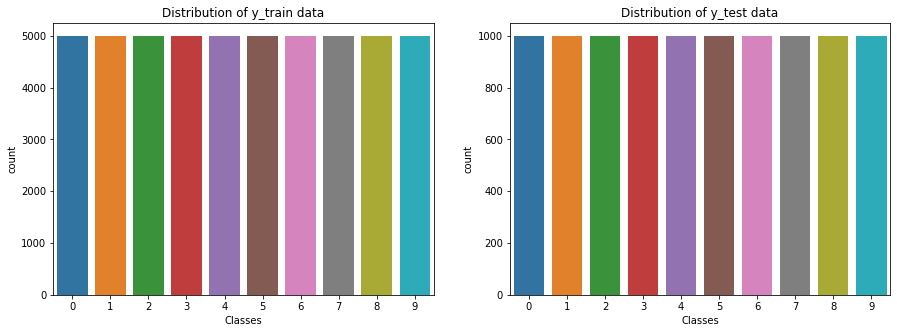

In [11]:
fig, axs = plt.subplots(1,2,figsize=(15,5)) 
# Count plot for training set
sns.countplot(y_train.ravel(), ax=axs[0])
axs[0].set_title('Distribution of y_train data')
axs[0].set_xlabel('Classes')
# Count plot for testing set
sns.countplot(y_test.ravel(), ax=axs[1])
axs[1].set_title('Distribution of y_test data')
axs[1].set_xlabel('Classes')
plt.show()

As we can see, each classe contain exacly 6000 examples( 5000 for training and 1000 for test).

The graph above is very important for the training, for example if we had just 1000 samples of label 1 that will be a problem , the model will find difficulties to detect label 1"less accuracy ", so that's not going to happend everything look fine. It's important to know the distribution of dataset behind different classes because the goodness of our model depend on it.

Now let's doing some preprocessing.

The output variable have 10 posible values. This is a multiclass classification problem. We need to encode these lables to one hot vectors (ex : "bird" -> [0,0,1,0,0,0,0,0,0,0])

## 4.2 Understanding and Visualizing classes

Let's understand the labels and the different classes associated with the labels. In this dataset, classes are not stated. Hence, let's plot out the images for each label and do some statistical analysis

In [12]:
y.unique()


array([6, 9, 4, 1, 2, 7, 8, 3, 5, 0], dtype=uint8)

### 4.2.1 Class 0 - Airplanes

In [13]:
class_0=data[data['label']==0]

In [14]:
class_0.shape

(6000, 1025)

Before we plot, we would need to reshape the dataframe into matrix od 32 X 32 given the pixels format stated on the official website

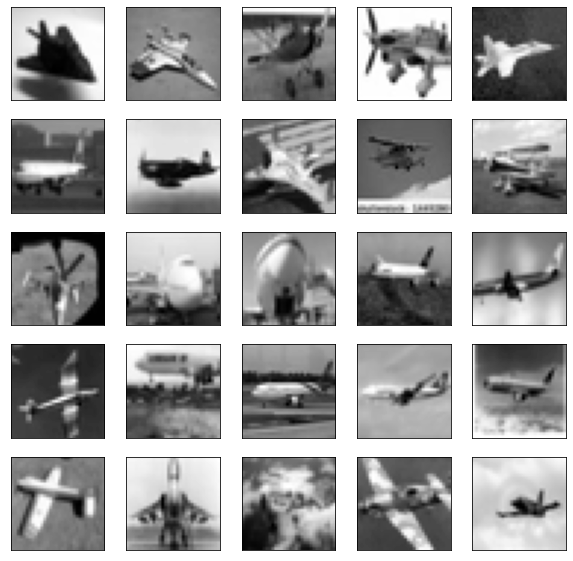

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(class_0.iloc[i,:-1].values.reshape(32,32),cmap="gray")  #reshaped matrix
    #plt.xlabel(class_names[y_train[i][0]])
plt.show()

Now, lets visualize the avergae pixel of the class 0 and visualize on the histogram plot. I will be using cdf - Curmulative Distribution Function. It indicates the fraction of pixels with intensity less than or equal to i, assuming the image has N pixels.

In [16]:
class_0.iloc[:,:-1]

0     1     2     3     4     5     6     7     8     9     ...  1014  \
29     203   203   205   207   209   210   211   213   214   216  ...   125   
30     119   116   120   120   123   123   125   126   123   125  ...   129   
35     250   246   246   247   248   247   247   247   248   247  ...    92   
49     255   255   255   182   180   255   254   254   255   255  ...   206   
77      62    65    69    75    78    78    78    79    79    81  ...    71   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
9973   243   242   243   241   242   244   242   238   236   240  ...   134   
9980   205   207   209   209   214   219   220   216   211   210  ...   230   
9983   182   157   101    89    65    25    34    38    27    32  ...    81   
9987   159   158   148   150   165   160   151   147   150   149  ...    87   
9991   140   141   142   142   143   143   144   144   144   144  ...   100   

      1015  1016  1017  1018  1019  1020  1021  1022  1023  
29     147   172   193   210   224   233   239   239   239  
30     129   128   127   125   124   122   121   119   114  
35     102   103   106   107   108   114   114   109   105  
49     244   255   255   255   255   255   255   255   255  
77      67    65    59    67    62    58    65    66    57  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
9973   134   134   134   134   135   135   134   133   134  
9980   232   232   232   233   234   235   237   238   240  
9983    91    89    78    67    71    74    89    97    93  
9987    89    93    96   103   106    96    93   105   107  
9991    89    81    78    77    77    74    78    48     9  

[6000 rows x 1024 columns]

In [17]:
class_0.iloc[:,:-1].mean() #averaging the pixels across all columns

0       158.878833
1       157.808000
2       158.500000
3       159.227000
4       159.962833
           ...    
1019    136.030333
1020    135.797500
1021    135.101333
1022    134.784667
1023    135.146667
Length: 1024, dtype: float64

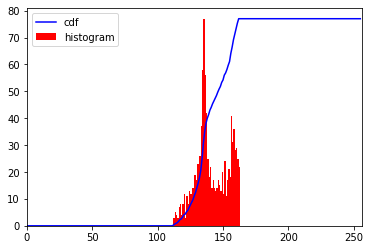

In [18]:
hist,bins = np.histogram(class_0.iloc[:,:-1].mean().values.reshape(1,1024)[0],256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(class_0.iloc[:,:-1].mean().values.reshape(1,1024)[0],256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

The X-axis represents the pixel intensity levels of the image. The intensity level usually ranges from 0 to 255. For a gray-scale image, there is only one histogram, whereas an RGB colored image will have three 2-D histograms — one for each color. The Y-axis of the histogram indicates the frequency or the number of pixels that have specific intensity values.

### Statistical Analysis of Class 0 
For class 0, there is a <b>sharp rise in cdf from 120 to 160 intensity level of the image.</b> There is a <b>sharp peak in middle which indicates the high frequency of 77 pixels between 120 to 150 intensity level of the image.</b> There is also a <b>second peak</b> where there is the second highest frequency of <b>40 pixels for 160 intensity level of the image</b>



### 4.2.2 Class 1 - Automobile

In [25]:
class_1=data[data['label']==1]

In [26]:
class_1.shape

(6000, 1025)

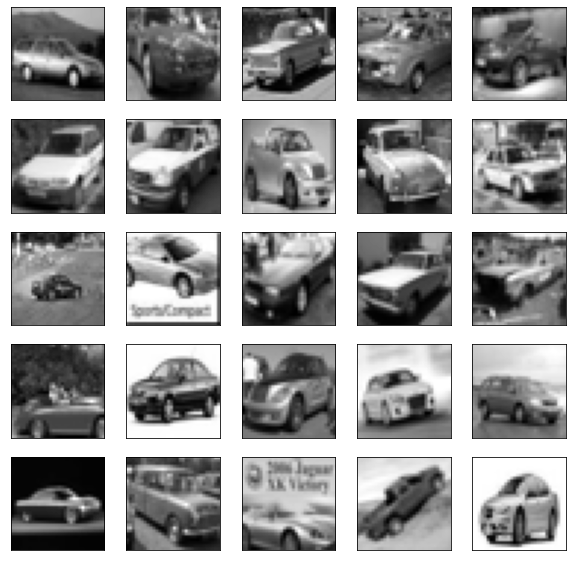

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(class_1.iloc[i,:-1].values.reshape(32,32),cmap="gray")  #reshaped matrix
    #plt.xlabel(class_names[y_train[i][0]])
plt.show()

From the graph plotted, we can see that class 1 are all images of automobiles.

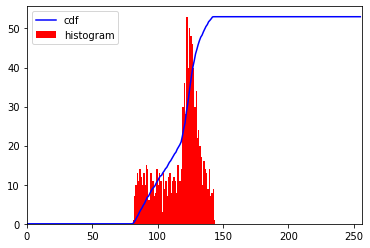

In [28]:
hist,bins = np.histogram(class_1.iloc[:,:-1].mean().values.reshape(1,1024)[0],256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(class_1.iloc[:,:-1].mean().values.reshape(1,1024)[0],256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

### Statistical Analysis of Class 1
For class 1, there is a <b>sharp rise in cdf from 80 to 140 intensity level of the image.</b> From 80 to 130 intensity level of image, there is <b>low frequency of pixels(~10 pixels).</b>There is a <b>sharp peak in middle which indicates the high frequency of ~50 pixels between 130 to 140 intensity level of the image.</b>



### 4.2.3 Class 2 - Bird

In [30]:
class_2=data[data['label']==2]

In [31]:
class_2.shape

(6000, 1025)

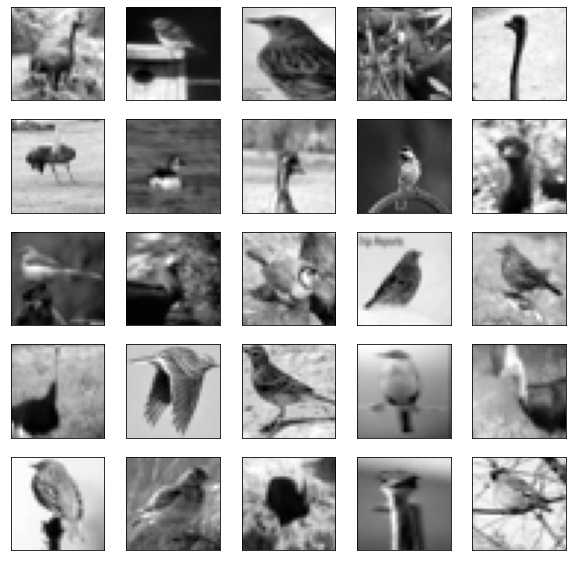

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(class_2.iloc[i,:-1].values.reshape(32,32),cmap="gray")  #reshaped matrix
    #plt.xlabel(class_names[y_train[i][0]])
plt.show()

From the graph plotted, we can see that class 2 are all images of bird. There are in total 6000 images this class.

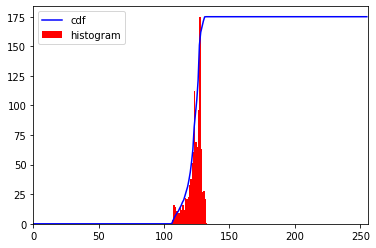

In [33]:
hist,bins = np.histogram(class_2.iloc[:,:-1].mean().values.reshape(1,1024)[0],256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(class_2.iloc[:,:-1].mean().values.reshape(1,1024)[0],256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

### Statistical Analysis of Class 2
For class 2, there is a <b>sharp rise from 10 to 175 pixels in cdf from 100 to 130 intensity level of the image.</b>



### 4.2.4 Class 3 - Cat

In [34]:
class_3=data[data['label']==3]

In [35]:
class_3.shape

(6000, 1025)

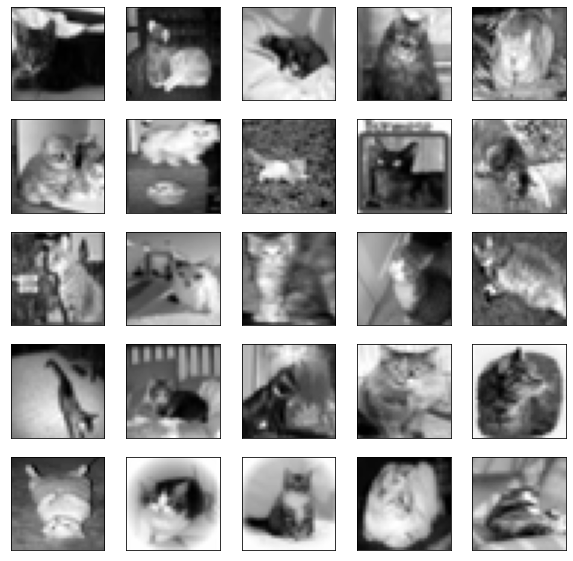

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(class_3.iloc[i,:-1].values.reshape(32,32),cmap="gray")  #reshaped matrix
    #plt.xlabel(class_names[y_train[i][0]])
plt.show()

From the graph plotted, we can see that class 3 are all images of cats. There are in total 6000 images this class.

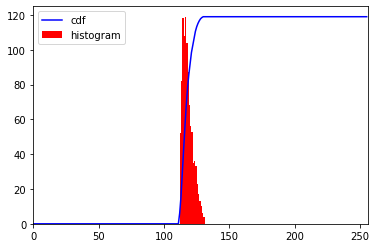

In [38]:
hist,bins = np.histogram(class_3.iloc[:,:-1].mean().values.reshape(1,1024)[0],256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(class_3.iloc[:,:-1].mean().values.reshape(1,1024)[0],256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

### Statistical Analysis of Class 3
For class 3, there is a <b>sharp rise from in cdf from 10 to 175 pixels between 100 to 130 intensity level of the image.</b>



### 4.2.5 Class 4 - Deer

In [39]:
class_4=data[data['label']==4]

In [40]:
class_4.shape

(6000, 1025)

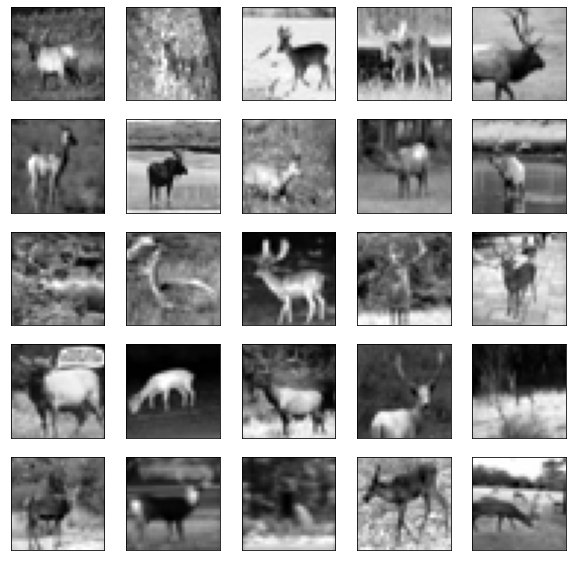

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(class_4.iloc[i,:-1].values.reshape(32,32),cmap="gray")  #reshaped matrix
    #plt.xlabel(class_names[y_train[i][0]])
plt.show()

From the graph plotted, we can see that class 4 are all images of deer. There are in total 6000 images this class.

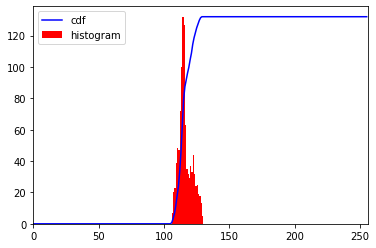

In [42]:
hist,bins = np.histogram(class_4.iloc[:,:-1].mean().values.reshape(1,1024)[0],256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(class_4.iloc[:,:-1].mean().values.reshape(1,1024)[0],256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

### Statistical Analysis of Class 4
For class 4, there is a <b>sharp rise from in cdf from 0 to 130 pixels between 100 to 130 intensity level of the image.</b>



### 4.2.6 Class 5 - Dog

In [43]:
class_5=data[data['label']==5]

In [44]:
class_5.shape

(6000, 1025)

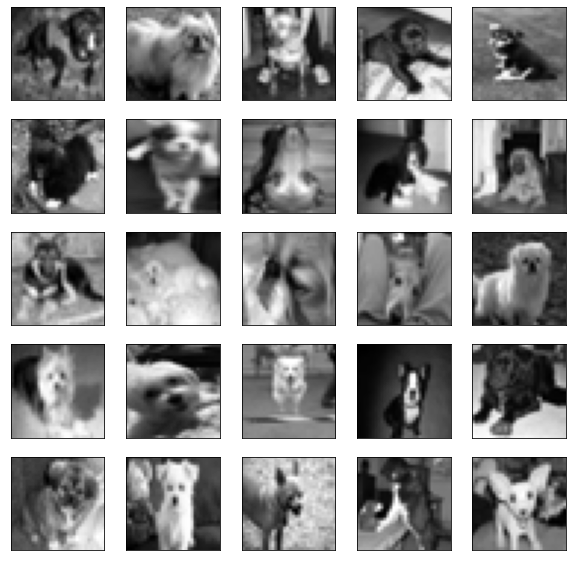

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(class_5.iloc[i,:-1].values.reshape(32,32),cmap="gray")  #reshaped matrix
    #plt.xlabel(class_names[y_train[i][0]])
plt.show()

From the graph plotted, we can see that class 5 are all images of deer. There are in total 6000 images this class

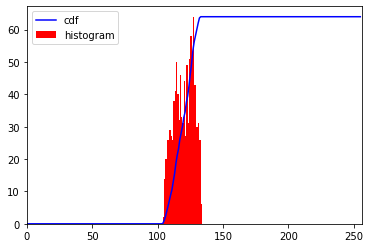

In [46]:
hist,bins = np.histogram(class_5.iloc[:,:-1].mean().values.reshape(1,1024)[0],256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(class_5.iloc[:,:-1].mean().values.reshape(1,1024)[0],256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

### Statistical Analysis of Class 5
For class 5, there is a <b>gradual rise from in cdf from 0 to 60 pixels between 100 to 130 intensity level of the image.</b>



### 4.2.7 Class 6 - Frog

In [47]:
class_6=data[data['label']==6]

In [48]:
class_6.shape

(6000, 1025)

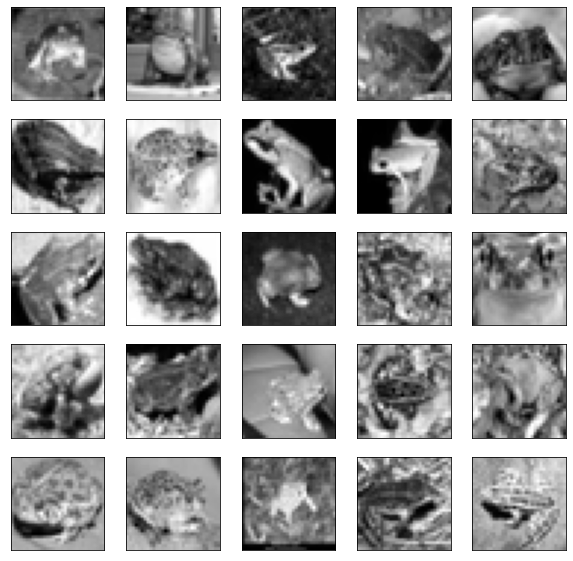

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(class_6.iloc[i,:-1].values.reshape(32,32),cmap="gray")  #reshaped matrix
    #plt.xlabel(class_names[y_train[i][0]])
plt.show()

From the graph plotted, we can see that class 6 are all images of frog. There are in total 6000 images this class.

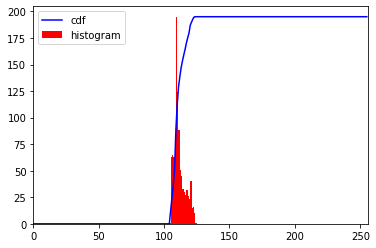

In [50]:
hist,bins = np.histogram(class_6.iloc[:,:-1].mean().values.reshape(1,1024)[0],256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(class_6.iloc[:,:-1].mean().values.reshape(1,1024)[0],256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

### Statistical Analysis of Class 6
For class 6, there is a <b>sharp rise from in cdf from 0 to 200 pixels between 100 to 130 intensity level of the image.</b>



### 4.2.8 Class 7 - Horse

In [51]:
class_7=data[data['label']==7]

In [52]:
class_7.shape

(6000, 1025)

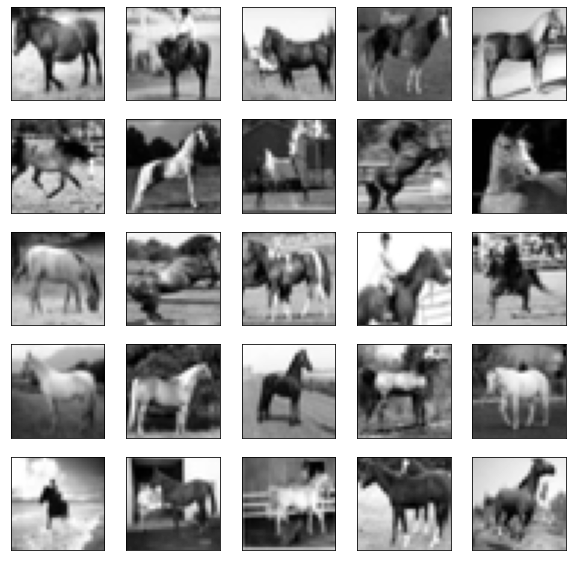

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(class_7.iloc[i,:-1].values.reshape(32,32),cmap="gray")  #reshaped matrix
    #plt.xlabel(class_names[y_train[i][0]])
plt.show()

From the graph plotted, we can see that class 7 are all images of horse. There are in total 6000 images this class.

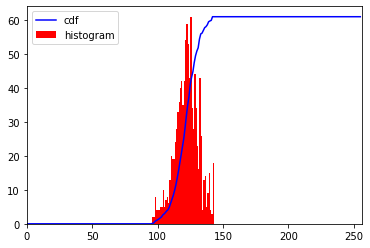

In [54]:
hist,bins = np.histogram(class_7.iloc[:,:-1].mean().values.reshape(1,1024)[0],256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(class_7.iloc[:,:-1].mean().values.reshape(1,1024)[0],256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

### Statistical Analysis of Class 7
For class 7, there is a <b>small rise and drop from in cdf from 0 to 60 back to 0 pixels between 100 to 150 intensity level of the image.</b>



### 4.2.9 Class 8 - Ship

In [55]:
class_8=data[data['label']==8]

In [56]:
class_8.shape

(6000, 1025)

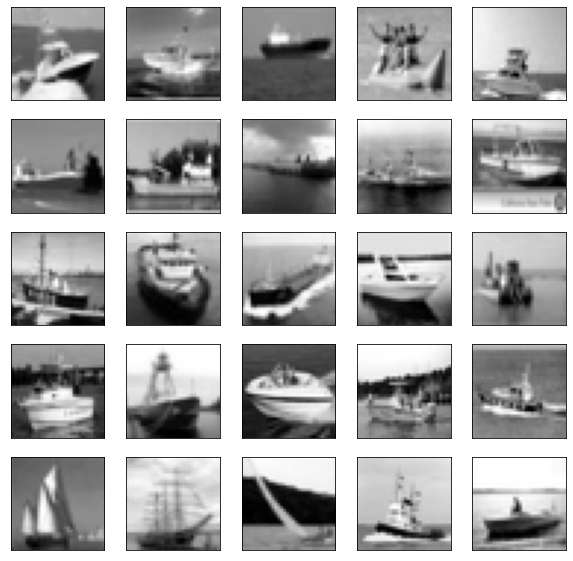

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(class_8.iloc[i,:-1].values.reshape(32,32),cmap="gray")  #reshaped matrix
    #plt.xlabel(class_names[y_train[i][0]])
plt.show()

From the graph plotted, we can see that class 8 are all images of ship. There are in total 6000 images this class.

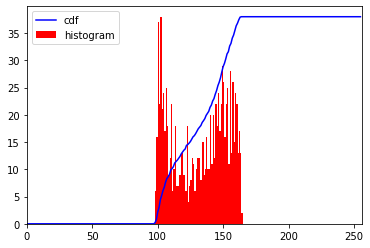

In [59]:
hist,bins = np.histogram(class_8.iloc[:,:-1].mean().values.reshape(1,1024)[0],256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(class_8.iloc[:,:-1].mean().values.reshape(1,1024)[0],256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

### Statistical Analysis of Class 8
For class 8, there is are 2 high peaks in the frequency of pixel <b>(one at 35 pixels for 100 intensity level of the image.</b> It then drops to 10 pixels and gradually increase to<b> 25 pixels between the range of 110 to 160 intensity levels of the image</b>



### 4.2.10 Class 9 - Truck

In [60]:
class_9=data[data['label']==9]

In [61]:
class_9.shape

(6000, 1025)

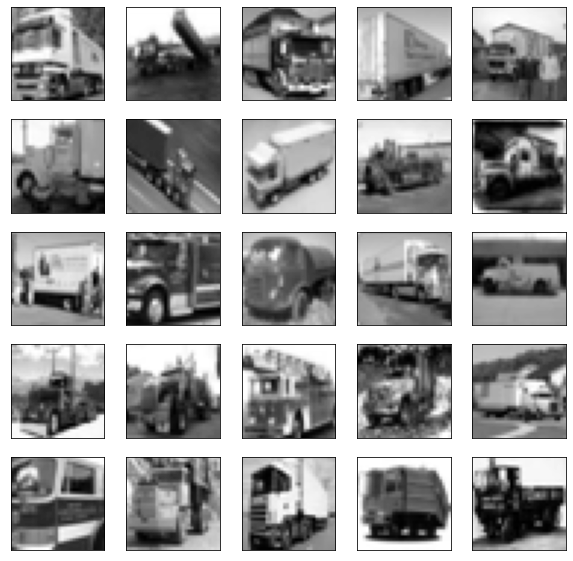

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(class_9.iloc[i,:-1].values.reshape(32,32),cmap="gray")  #reshaped matrix
    #plt.xlabel(class_names[y_train[i][0]])
plt.show()

From the graph plotted, we can see that class 9 are all images of trucks. There are in total 6000 images this class.

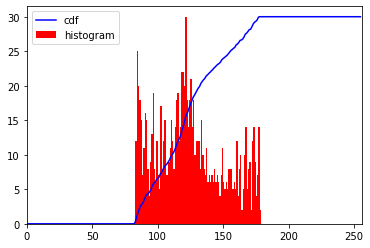

In [63]:
hist,bins = np.histogram(class_9.iloc[:,:-1].mean().values.reshape(1,1024)[0],256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(class_9.iloc[:,:-1].mean().values.reshape(1,1024)[0],256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

### Statistical Analysis of Class 9
For class 9, there is wide spread of pixels between 80 to 170 intensity level of the image. There are 3 high peaks in the frequency of pixel:<br>
- 1st peak: 25 pixels at 80 intensity level of image
- 2nd peak: 30 pixel between 120 to 140 intensity level of image
- 3rd peak: 15 pixel between 150 to 170 intensity level of image



### 4.2.11 Classes comparison

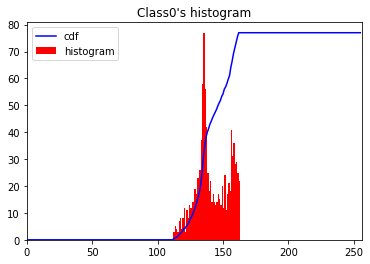

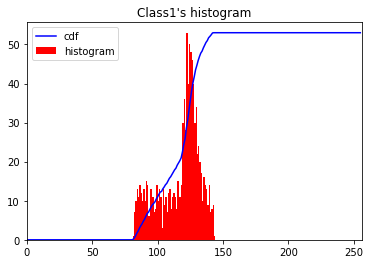

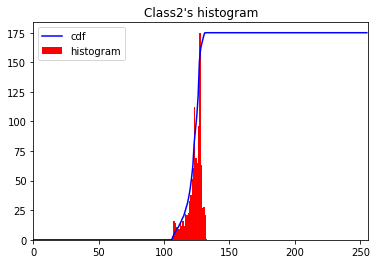

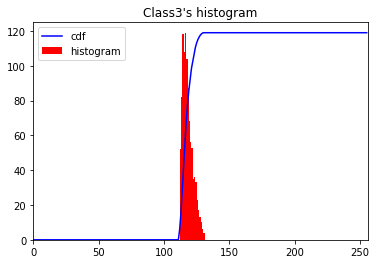

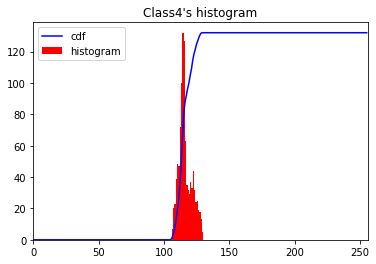

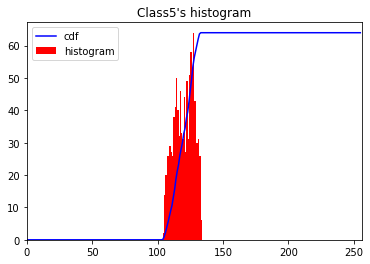

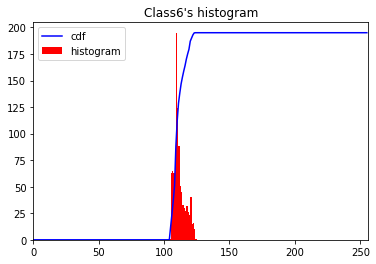

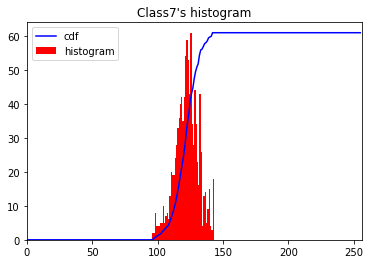

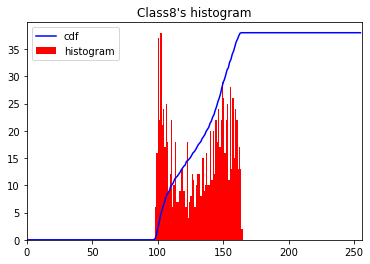

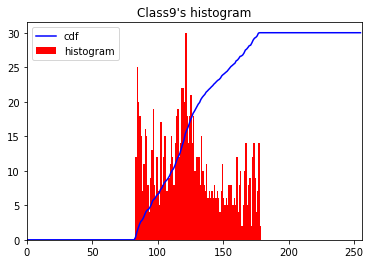

In [24]:
for i in range(10):
    hist,bins = np.histogram(data[data['label']==i].iloc[:,:-1].mean().values.reshape(1,1024)[0],256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * float(hist.max()) / cdf.max()
    plt.plot(cdf_normalized, color = 'b')
    plt.hist(data[data['label']==i].iloc[:,:-1].mean().values.reshape(1,1024)[0],256,[0,256], color = 'r')
    plt.xlim([0,256])
    plt.legend(('cdf','histogram'), loc = 'upper left')
    plt.title("Class"+str(i)+"'s histogram")
    plt.show()

As shown in the table, i have summarised the statistical insights for each classes of image:
<table>
    <thead>
        <td><b>Class</b></td>
        <td><b>Rise in Cdf</b></td>
        <td><b>Number of peaks</b></td>
        <td><b>Range of intensity level</b></td>
    </thead>
    <tr>
        <td>0</td>
        <td>0 to 75 to 15 to 40</td>
        <td>2</td>
        <td>100 to 130</td>
    </tr>
    <tr>
        <td>1</td>
        <td>0 to 10 to 50 to 10 </td>
        <td>1</td>
        <td>100 to 130</td>
    </tr>
    <tr>
        <td>2</td>
        <td>0 to 175</td>
        <td>1</td>
        <td>100 to 130</td>
    </tr>
    <tr>
        <td>3</td>
        <td>0 to 120</td>
        <td>1</td>
        <td>120 to 130</td>
    </tr>
    <tr>
        <td>4</td>
        <td>0 to 125</td>
        <td>1</td>
        <td>120 to 130</td>
    </tr>
    <tr>
        <td>5</td>
        <td>0 to 60</td>
        <td>1</td>
        <td>100 to 130</td>
    </tr>   
    <tr>
        <td>6</td>
        <td>0 to 190</td>
        <td>1</td>
        <td>100 to 130</td>
    </tr>  
    <tr>
        <td>7</td>
        <td>0 to 60</td>
        <td>1</td>
        <td>100 to 140</td>
    </tr>   
    <tr>
        <td>8</td>
        <td>0 to 3 to 5 to 25</td>
        <td>2</td>
        <td>100 to 160</td>
    </tr> 
    <tr>
        <td>9</td>
        <td>25 to 5 to 30 to 5 to 15</td>
        <td>3</td>
        <td>80 to 175</td>
    </tr> 
</table>

<b>Insights:</b><br>
- Classes with rise in cdf between intensity level 100 to 130 are classes 0,1,2,3,6,7,8
- Classes with 2 or more peaks - classes 0,5,8,9
- Classes with similar-looking histograms - classes 2,3,4,5,6,7 (shows that the pictures edges,cuts,shadow etc picture attributes are the same)





<a id='5'><h1 style="background-color:lightpink;border-radius:5px;text-align:center;padding:7px;color:white;">5. Data Preparation for Input Data</h2>

## 5.1 Data Normalization
Since our data is ready we now need to normalize the data, since normalizing the images in deep learning will produce very good results. Normalizing means we are bringing all the values in the data into a common scale 0-1. This will make out model converge fast and also we will not have any distrotions in the data.

For normalizing the pixel data (Image) we can simply divide the whole pixel values with 255 since pixel values ranges from 0-255. So if we divide them with 255 we automatically normalizee the data between 0-1.

In [263]:
# Normalizing
X_train=X_train/255
X_test=X_test/255
X=X/255

<a id='6'><h1 style="background-color:lightpink;border-radius:5px;text-align:center;padding:7px;color:white;">6. Derive black and white images from original color images</h2>

<a id='61'><h2 style="padding:5px;color:white;background-color:#C4E0E5;text-align: center;margin-left:auto;margin-right:auto;border-radius:10px;">6.1 Import cifar-10 original colored images</h2><br>

In [1]:
import tarfile
tar = tarfile.open('cifar-10-python.tar.gz', "r:gz")
tar.extractall()
tar.close()

In [2]:
for i in tar:
    print(i)

<TarInfo 'cifar-10-batches-py' at 0x291e82e4880>
<TarInfo 'cifar-10-batches-py/data_batch_4' at 0x291e82e4e80>
<TarInfo 'cifar-10-batches-py/readme.html' at 0x291e82e4400>
<TarInfo 'cifar-10-batches-py/test_batch' at 0x291e82e4f40>
<TarInfo 'cifar-10-batches-py/data_batch_3' at 0x291e8351040>
<TarInfo 'cifar-10-batches-py/batches.meta' at 0x291e8351100>
<TarInfo 'cifar-10-batches-py/data_batch_2' at 0x291e8351280>
<TarInfo 'cifar-10-batches-py/data_batch_5' at 0x291e83511c0>
<TarInfo 'cifar-10-batches-py/data_batch_1' at 0x291e8351400>


<a id='62'><h2 style="padding:5px;color:white;background-color:#C4E0E5;text-align: center;margin-left:auto;margin-right:auto;border-radius:10px;">6.2 Preprocess cifar-10 original colored images</h2><br>

In [3]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict
unpickle('cifar-10-batches-py/data_batch_1')

{b'batch_label': b'training batch 1 of 5',
 b'labels': [6,
  9,
  9,
  4,
  1,
  1,
  2,
  7,
  8,
  3,
  4,
  7,
  7,
  2,
  9,
  9,
  9,
  3,
  2,
  6,
  4,
  3,
  6,
  6,
  2,
  6,
  3,
  5,
  4,
  0,
  0,
  9,
  1,
  3,
  4,
  0,
  3,
  7,
  3,
  3,
  5,
  2,
  2,
  7,
  1,
  1,
  1,
  2,
  2,
  0,
  9,
  5,
  7,
  9,
  2,
  2,
  5,
  2,
  4,
  3,
  1,
  1,
  8,
  2,
  1,
  1,
  4,
  9,
  7,
  8,
  5,
  9,
  6,
  7,
  3,
  1,
  9,
  0,
  3,
  1,
  3,
  5,
  4,
  5,
  7,
  7,
  4,
  7,
  9,
  4,
  2,
  3,
  8,
  0,
  1,
  6,
  1,
  1,
  4,
  1,
  8,
  3,
  9,
  6,
  6,
  1,
  8,
  5,
  2,
  9,
  9,
  8,
  1,
  7,
  7,
  0,
  0,
  6,
  9,
  1,
  2,
  2,
  9,
  2,
  6,
  6,
  1,
  9,
  5,
  0,
  4,
  7,
  6,
  7,
  1,
  8,
  1,
  1,
  2,
  8,
  1,
  3,
  3,
  6,
  2,
  4,
  9,
  9,
  5,
  4,
  3,
  6,
  7,
  4,
  6,
  8,
  5,
  5,
  4,
  3,
  1,
  8,
  4,
  7,
  6,
  0,
  9,
  5,
  1,
  3,
  8,
  2,
  7,
  5,
  3,
  4,
  1,
  5,
  7,
  0,
  4,
  7,
  5,
  5,
  1,
  0,
  9,
  6,
  9,
 

<a id='63'><h2 style="padding:5px;color:white;background-color:#C4E0E5;text-align: center;margin-left:auto;margin-right:auto;border-radius:10px;">6.3 Data Understanding of cifar-10 original colored images</h2><br>

In [4]:
data_batch1=unpickle('cifar-10-batches-py/data_batch_1')

In [5]:
data_batch1

{b'batch_label': b'training batch 1 of 5',
 b'labels': [6,
  9,
  9,
  4,
  1,
  1,
  2,
  7,
  8,
  3,
  4,
  7,
  7,
  2,
  9,
  9,
  9,
  3,
  2,
  6,
  4,
  3,
  6,
  6,
  2,
  6,
  3,
  5,
  4,
  0,
  0,
  9,
  1,
  3,
  4,
  0,
  3,
  7,
  3,
  3,
  5,
  2,
  2,
  7,
  1,
  1,
  1,
  2,
  2,
  0,
  9,
  5,
  7,
  9,
  2,
  2,
  5,
  2,
  4,
  3,
  1,
  1,
  8,
  2,
  1,
  1,
  4,
  9,
  7,
  8,
  5,
  9,
  6,
  7,
  3,
  1,
  9,
  0,
  3,
  1,
  3,
  5,
  4,
  5,
  7,
  7,
  4,
  7,
  9,
  4,
  2,
  3,
  8,
  0,
  1,
  6,
  1,
  1,
  4,
  1,
  8,
  3,
  9,
  6,
  6,
  1,
  8,
  5,
  2,
  9,
  9,
  8,
  1,
  7,
  7,
  0,
  0,
  6,
  9,
  1,
  2,
  2,
  9,
  2,
  6,
  6,
  1,
  9,
  5,
  0,
  4,
  7,
  6,
  7,
  1,
  8,
  1,
  1,
  2,
  8,
  1,
  3,
  3,
  6,
  2,
  4,
  9,
  9,
  5,
  4,
  3,
  6,
  7,
  4,
  6,
  8,
  5,
  5,
  4,
  3,
  1,
  8,
  4,
  7,
  6,
  0,
  9,
  5,
  1,
  3,
  8,
  2,
  7,
  5,
  3,
  4,
  1,
  5,
  7,
  0,
  4,
  7,
  5,
  5,
  1,
  0,
  9,
  6,
  9,
 

### 6.3.1 Data Understanding of keys

In [6]:
data_batch1.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

The data_batches imported from the tar.gz file is in the form of dictionary with 4 keys namely, b'batch_label', b'labels', b'data', b'filenames'. Let's explore each key and the corresponding values

In [7]:
data_batch1[b'batch_label']

b'training batch 1 of 5'

In [8]:
data_batch1[b'labels']

[6,
 9,
 9,
 4,
 1,
 1,
 2,
 7,
 8,
 3,
 4,
 7,
 7,
 2,
 9,
 9,
 9,
 3,
 2,
 6,
 4,
 3,
 6,
 6,
 2,
 6,
 3,
 5,
 4,
 0,
 0,
 9,
 1,
 3,
 4,
 0,
 3,
 7,
 3,
 3,
 5,
 2,
 2,
 7,
 1,
 1,
 1,
 2,
 2,
 0,
 9,
 5,
 7,
 9,
 2,
 2,
 5,
 2,
 4,
 3,
 1,
 1,
 8,
 2,
 1,
 1,
 4,
 9,
 7,
 8,
 5,
 9,
 6,
 7,
 3,
 1,
 9,
 0,
 3,
 1,
 3,
 5,
 4,
 5,
 7,
 7,
 4,
 7,
 9,
 4,
 2,
 3,
 8,
 0,
 1,
 6,
 1,
 1,
 4,
 1,
 8,
 3,
 9,
 6,
 6,
 1,
 8,
 5,
 2,
 9,
 9,
 8,
 1,
 7,
 7,
 0,
 0,
 6,
 9,
 1,
 2,
 2,
 9,
 2,
 6,
 6,
 1,
 9,
 5,
 0,
 4,
 7,
 6,
 7,
 1,
 8,
 1,
 1,
 2,
 8,
 1,
 3,
 3,
 6,
 2,
 4,
 9,
 9,
 5,
 4,
 3,
 6,
 7,
 4,
 6,
 8,
 5,
 5,
 4,
 3,
 1,
 8,
 4,
 7,
 6,
 0,
 9,
 5,
 1,
 3,
 8,
 2,
 7,
 5,
 3,
 4,
 1,
 5,
 7,
 0,
 4,
 7,
 5,
 5,
 1,
 0,
 9,
 6,
 9,
 0,
 8,
 7,
 8,
 8,
 2,
 5,
 2,
 3,
 5,
 0,
 6,
 1,
 9,
 3,
 6,
 9,
 1,
 3,
 9,
 6,
 6,
 7,
 1,
 0,
 9,
 5,
 8,
 5,
 2,
 9,
 0,
 8,
 8,
 0,
 6,
 9,
 1,
 1,
 6,
 3,
 7,
 6,
 6,
 0,
 6,
 6,
 1,
 7,
 1,
 5,
 8,
 3,
 6,
 6,
 8,
 6,
 8,
 4,
 6,
 6,


In [9]:
data_batch1[b'data']

array([[ 59,  43,  50, ..., 140,  84,  72],
       [154, 126, 105, ..., 139, 142, 144],
       [255, 253, 253, ...,  83,  83,  84],
       ...,
       [ 71,  60,  74, ...,  68,  69,  68],
       [250, 254, 211, ..., 215, 255, 254],
       [ 62,  61,  60, ..., 130, 130, 131]], dtype=uint8)

In [10]:
data_batch1[b'data'].shape

(10000, 3072)

In [11]:
data_batch1[b'filenames']

[b'leptodactylus_pentadactylus_s_000004.png',
 b'camion_s_000148.png',
 b'tipper_truck_s_001250.png',
 b'american_elk_s_001521.png',
 b'station_wagon_s_000293.png',
 b'coupe_s_001735.png',
 b'cassowary_s_001300.png',
 b'cow_pony_s_001168.png',
 b'sea_boat_s_001584.png',
 b'tabby_s_001355.png',
 b'muntjac_s_001000.png',
 b'arabian_s_001354.png',
 b'quarter_horse_s_000672.png',
 b'passerine_s_000343.png',
 b'camion_s_001895.png',
 b'trailer_truck_s_000335.png',
 b'dumper_s_000821.png',
 b'alley_cat_s_000200.png',
 b'accentor_s_000677.png',
 b'frog_s_001671.png',
 b'capreolus_capreolus_s_000051.png',
 b'tomcat_s_000772.png',
 b'pickerel_frog_s_000446.png',
 b'bufo_s_001242.png',
 b'cassowary_s_001246.png',
 b'toad_s_001748.png',
 b'cat_s_000081.png',
 b'chihuahua_s_000825.png',
 b'alces_alces_s_000959.png',
 b'stealth_bomber_s_000554.png',
 b'twinjet_s_000663.png',
 b'trucking_rig_s_001402.png',
 b'auto_s_000609.png',
 b'tabby_cat_s_000983.png',
 b'wapiti_s_000416.png',
 b'monoplane_s_000

From what was read from each key and the corresponding values, there are a total of 4 keys - b'batch_label', b'labels', b'data', b'filenames'
1. b'batch_label'- Batch label of the dataset (can be batch 1,2,3 etc)
2. b'labels' - Label of classes
3. b'data' - Images matrix
4. b'filenames' - Images filename (.png format)


### 6.3.2 Data Understanding of data structure

In [274]:
print("Number of data samples:",len(data_batch1[b'data']))

Number of data samples: 10000


In [275]:
print("Number of columns:",len(data_batch1.keys()))

Number of columns: 4


In [276]:
print("Data Shape:",len(data_batch1[b'data']),",",len(data_batch1.keys()))

Data Shape: 10000 , 4


### 6.3.3 Data Understanding of data structure of b'data (images)

In [12]:
data_batch1[b'data']

array([[ 59,  43,  50, ..., 140,  84,  72],
       [154, 126, 105, ..., 139, 142, 144],
       [255, 253, 253, ...,  83,  83,  84],
       ...,
       [ 71,  60,  74, ...,  68,  69,  68],
       [250, 254, 211, ..., 215, 255, 254],
       [ 62,  61,  60, ..., 130, 130, 131]], dtype=uint8)

In [13]:
data_batch1[b'data'].shape

(10000, 3072)

In [15]:
data_colored = pd.DataFrame.from_dict(data_batch1[b'data'])
data_colored

0     1     2     3     4     5     6     7     8     9     ...  3062  \
0       59    43    50    68    98   119   139   145   149   149  ...    59   
1      154   126   105   102   125   155   172   180   142   111  ...    22   
2      255   253   253   253   253   253   253   253   253   253  ...    78   
3       28    37    38    42    44    40    40    24    32    43  ...    53   
4      170   168   177   183   181   177   181   184   189   189  ...    92   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
9995    18    18    21    23    24    23    24    25    22    19  ...    20   
9996   235   240   249   253   254   253   254   254   179   108  ...    75   
9997    71    60    74    73    87   125   179   231   250   252  ...    71   
9998   250   254   211    64    61    60    55    54    55    59  ...   134   
9999    62    61    60    59    94   123   140   105    58    57  ...   131   

      3063  3064  3065  3066  3067  3068  3069  3070  3071  
0       58    65    59    46    57   104   140    84    72  
1       42    67   101   122   133   136   139   142   144  
2       83    80    69    66    72    79    83    83    84  
3       39    59    42    44    48    38    28    37    46  
4       88    85    82    83    79    78    82    78    80  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
9995    24    33    41    45    39    39    39    34    37  
9996    89   113   139   163   174   179   182   181   181  
9997    70    67    66    70    81    78    68    69    68  
9998   134   132   130   127   132   133   215   255   254  
9999   131   131   131   131   130   130   130   130   131  

[10000 rows x 3072 columns]

In [16]:
data_colored.shape

(10000, 3072)

Lets, find out why X has 3072 columms? <br>
According to the orignial http://www.cs.toronto.edu/~kriz/cifar.html website, it was mentioned that the CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. <br><br>
Hence the 3072 is derived from <b>32 X 32 X 3= 1024</b> where 32 represents the width and height of each image. 3 represents the number of color channels which is only applicable for colored images as they have red, green and blue as the color combinations to form a colored images




<a id='64'><h2 style="padding:5px;color:white;background-color:#C4E0E5;text-align: center;margin-left:auto;margin-right:auto;border-radius:10px;">6.4 Data Preparation - Convert the first 50 cifar-10 colored training images to black & white using Python Imaging Library</h2><br>

The original one batch data is (10000 x 3072) matrix expressed in numpy array. The number of columns, (10000), indicates the number of sample data. As stated in the CIFAR-10/CIFAR-100 dataset, the row vector, (3072) represents an color image of 32x32 pixels. 

The dimension of the input tensor should be either (width x height x num_channel) or (num_channel x width x height).

Hence, we would need to reshape the numpy matrix

First, lets extract the first 50 images as only first 50 images is required in the conversion as stated in the assignment requirments

In [280]:
X_colored=data_batch1[b'data'][0:50]

In [19]:
data_batch1[b'data'].shape

(10000, 3072)

In [281]:
X_colored.shape

(50, 3072)

### 6.4.1 Reshaping cifar-10 original colored data numpy matrix

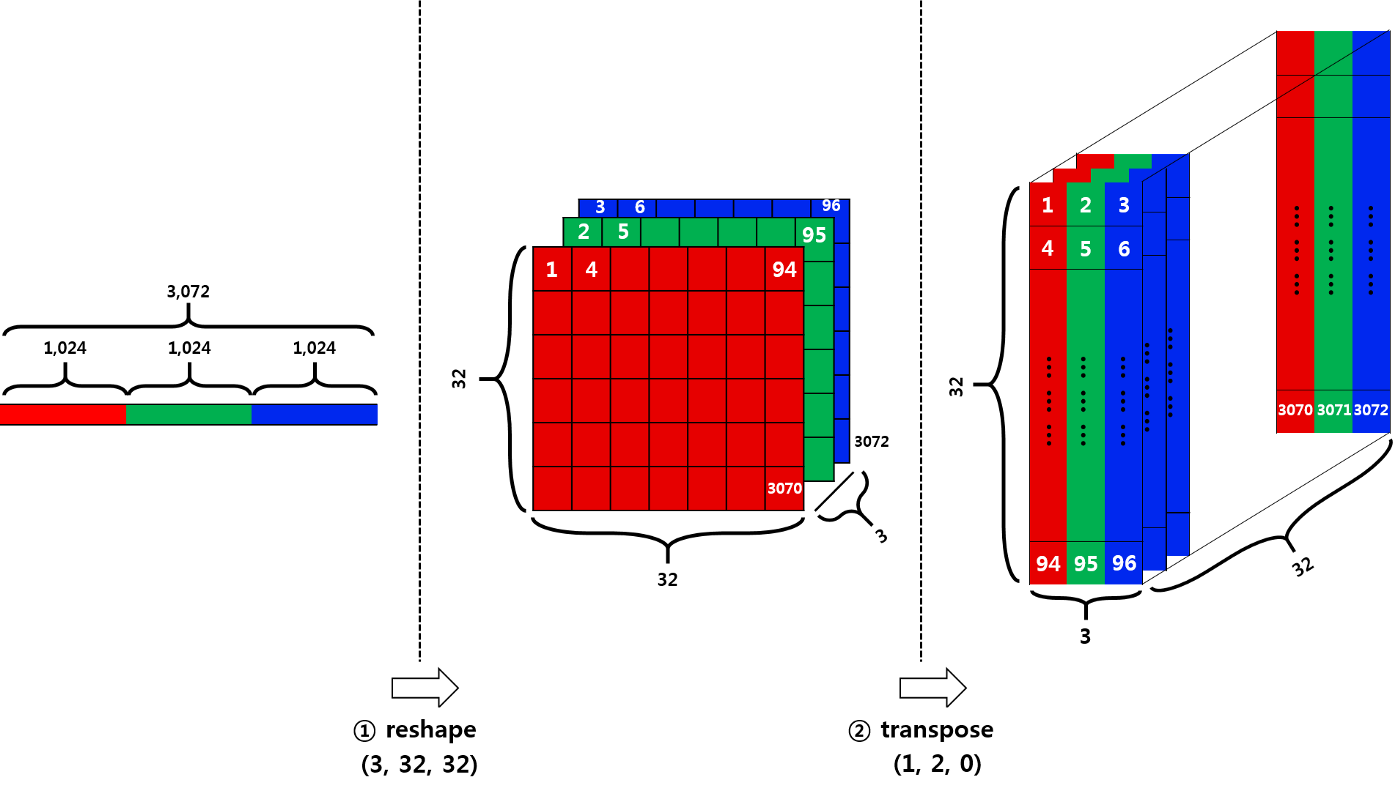

In [282]:
from IPython.display import Image

Image(filename =r"C:\Users\JiaYi\Downloads\Yr3Sem3 Assignment\AI_TECH_Assignment\reshape_transpose.png")


### Step 1: Reshape the numpy matrix from shape: (50,3072) to (50,3,32,32)

In [283]:
X_colored=X_colored.reshape(50,3,32,32)
X_colored

array([[[[ 59,  43,  50, ..., 158, 152, 148],
         [ 16,   0,  18, ..., 123, 119, 122],
         [ 25,  16,  49, ..., 118, 120, 109],
         ...,
         [208, 201, 198, ..., 160,  56,  53],
         [180, 173, 186, ..., 184,  97,  83],
         [177, 168, 179, ..., 216, 151, 123]],

        [[ 62,  46,  48, ..., 132, 125, 124],
         [ 20,   0,   8, ...,  88,  83,  87],
         [ 24,   7,  27, ...,  84,  84,  73],
         ...,
         [170, 153, 161, ..., 133,  31,  34],
         [139, 123, 144, ..., 148,  62,  53],
         [144, 129, 142, ..., 184, 118,  92]],

        [[ 63,  45,  43, ..., 108, 102, 103],
         [ 20,   0,   0, ...,  55,  50,  57],
         [ 21,   0,   8, ...,  50,  50,  42],
         ...,
         [ 96,  34,  26, ...,  70,   7,  20],
         [ 96,  42,  30, ...,  94,  34,  34],
         [116,  94,  87, ..., 140,  84,  72]]],


       [[[154, 126, 105, ...,  91,  87,  79],
         [140, 145, 125, ...,  96,  77,  71],
         [140, 139, 115, ..., 

### Step 2: Transpose the numpy matrix

In [284]:
X_colored=X_colored.transpose(0,2,3,1).astype("uint8")
X_colored

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

### 6.4.2 Save cifar-10 original colored images in a "rgbimages" file

In [285]:
import os 
if not os.path.exists("rgbimages"):
    os.makedirs('rgbimages')

In [286]:
for i in range(0,50):
    plt.imshow(X_colored[i])
    plt.savefig("rgbimages/{0}.jpg".format(i))
    plt.close()

### 6.4.3 Convert colored images to blackwhite and save it in the "converted_blackwhiteimages" file

In [287]:
if not os.path.exists("converted_blackwhiteimages"):
    os.makedirs('converted_blackwhiteimages')

In [288]:
from PIL import Image
for i in range(0,50):
    img = Image.open('rgbimages/{0}.jpg'.format(i))
    imgGray = img.convert('L')
    imgGray.save('converted_blackwhiteimages/{0}.jpg'.format(i))

Let's see the original colored image

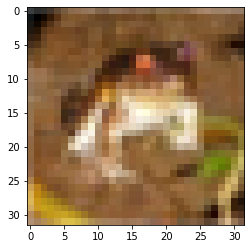

In [289]:
plt.imshow(X_colored[0])

Let's see the converted black white images

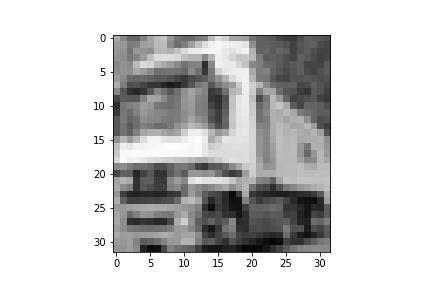

In [290]:
Image.open('converted_blackwhiteimages/1.jpg')


<a id='65'><h2 style="padding:5px;color:white;background-color:#C4E0E5;text-align: center;margin-left:auto;margin-right:auto;border-radius:10px;">6.5 Data Verification - Verify the black and white values are identical to input dataset (black white images)</h2><br>

### 6.5.1. Save input dataset - train batch1 to "original_blackwhiteimages" directory

In [291]:
import os
if not os.path.exists("original_blackwhiteimages"):
    os.makedirs('original_blackwhiteimages')

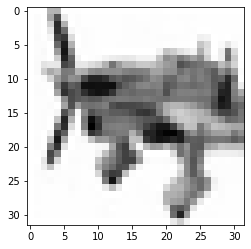

In [298]:
for i in range(0,50):
    plt.imshow(train_batch1.iloc[i,:-1].values.reshape(32,32),cmap="gray")
    plt.savefig('original_blackwhiteimages/{0}.jpg'.format(i))
    

### 6.5.2 Compare images from original_blackwhiteimages and converted_blackwhiteimages directory  

Let's take a look at the first data sample 

In [299]:
original = Image.open('original_blackwhiteimages/3.jpg').convert('L')
converted = Image.open('converted_blackwhiteimages/3.jpg').convert('L')

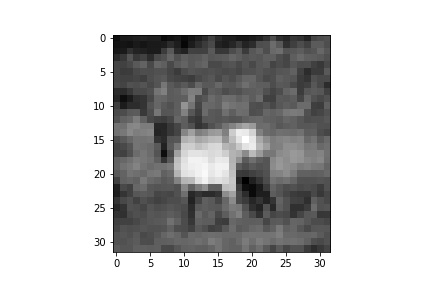

In [300]:
original

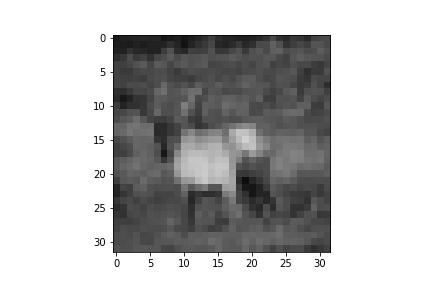

In [301]:
converted

Looks like there are no difference when spotted using the human eye. Now let's use the PIL imaging library to scrutinize the difference between the 2 images as they overlap

### 6.5.2.1 Compare with PIL imaging library

Difference in Images:


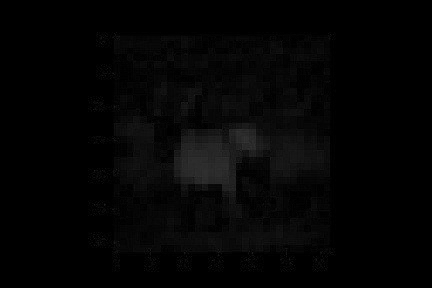

In [302]:
from PIL import Image, ImageChops
print("Difference in Images:")
ImageChops.difference(original, converted)

From the image above looks like there are some difference between both images given some white shade as shown in the centre of the picture

### 6.5.2.2 Spotting differences using PIL library

Now lets create a directory for the picturer used to identify the difference between the original input dataset and the converted blackwhite images

In [351]:
import os
if not os.path.exists("difference_blackwhiteimages"):
    os.makedirs('difference_blackwhiteimages')

In [358]:
for i in range(50):
    img1 = Image.open('original_blackwhiteimages/{0}.jpg'.format(i)).convert('L')
    img2 = Image.open('converted_blackwhiteimages/{0}.jpg'.format(i)).convert('L')
    ImageChops.difference(img1, img2).save('difference_blackwhiteimages/{0}.jpg'.format(i))

### 6.5.2.3 Plotting the differences between the original input dataset and the converted blackwhite images

Now let's plot the difference for all 50 pictures 

In [399]:
path='difference_blackwhiteimages'
images=os.listdir(path)


<ipython-input-397-bb15add23fdd>:13: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(images) / columns + 1, columns, i + 1)


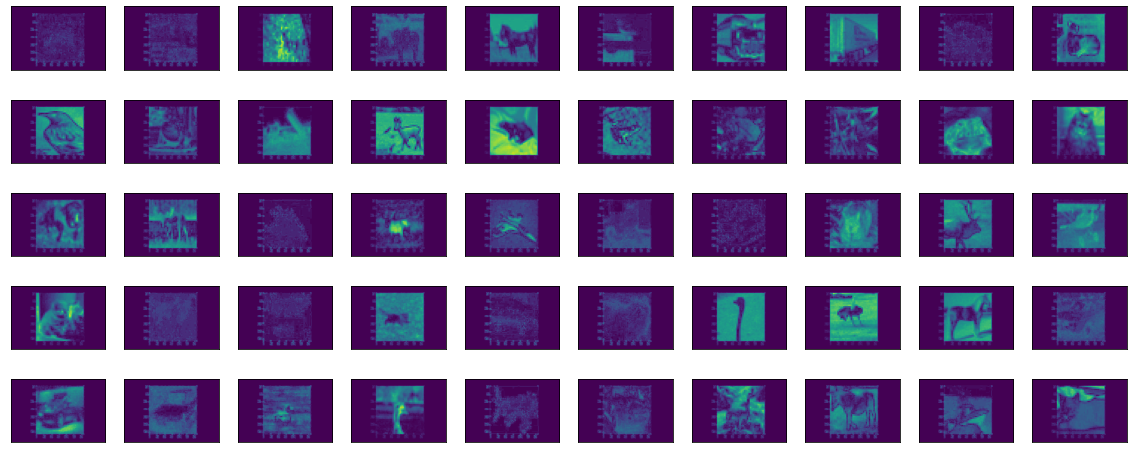

In [397]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

images = []
for img_path in glob.glob('difference_blackwhiteimages/*.jpg'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,10))
columns = 10
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

Now lets go into detail

<ipython-input-395-538b732d4bfe>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


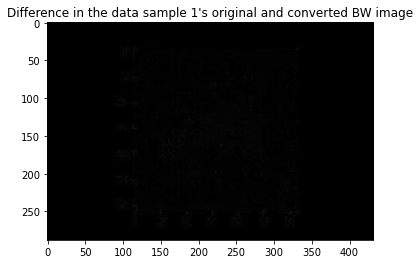

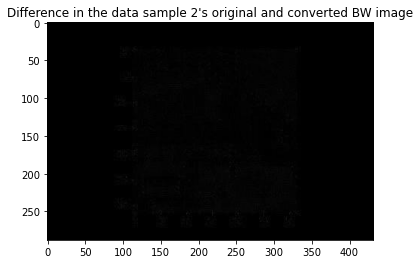

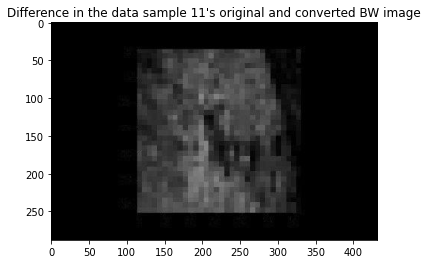

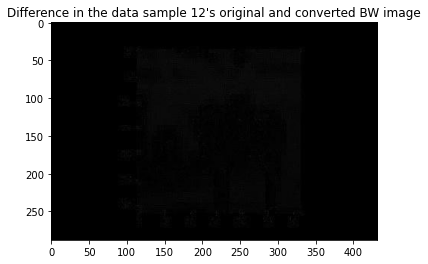

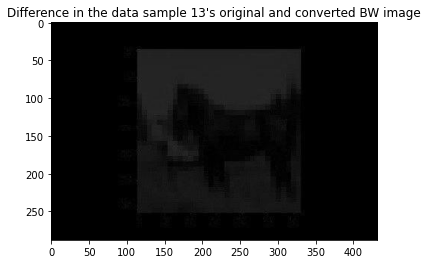

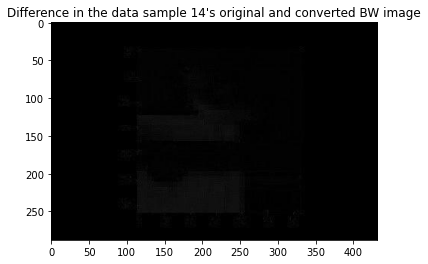

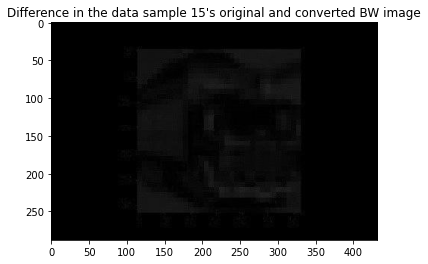

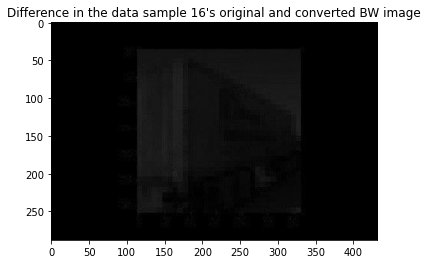

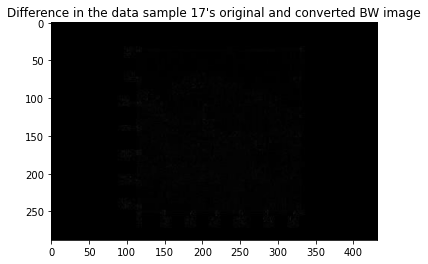

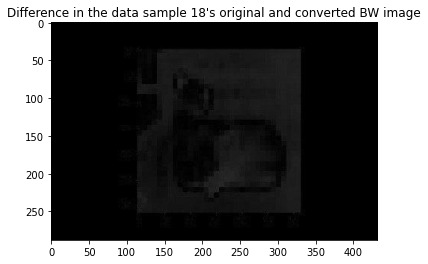

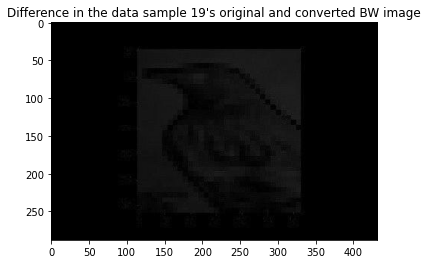

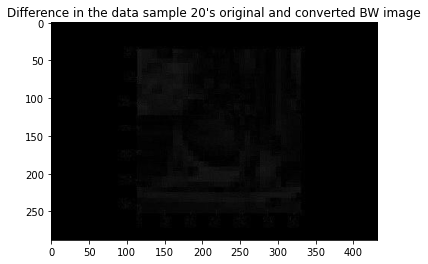

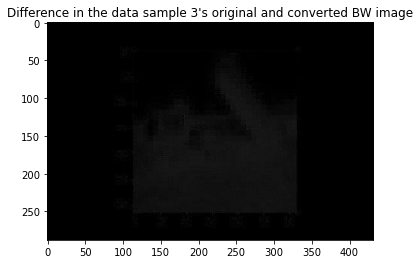

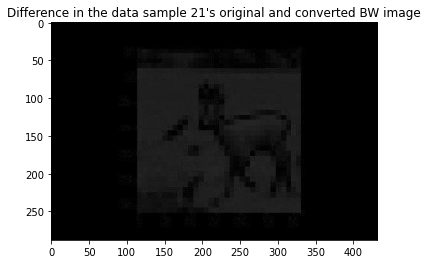

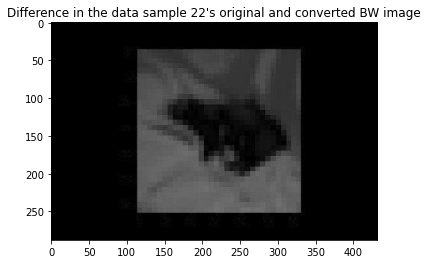

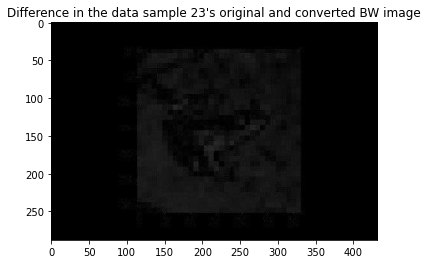

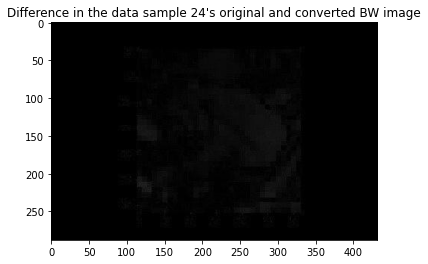

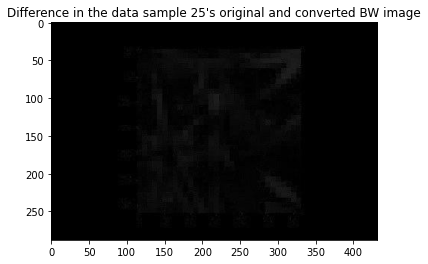

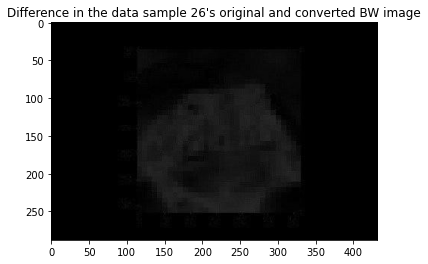

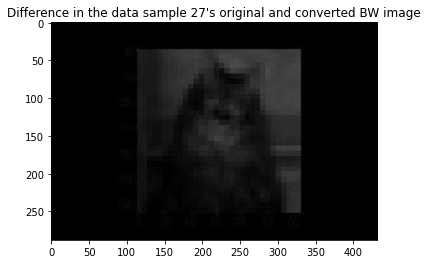

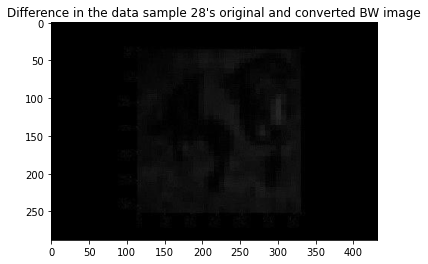

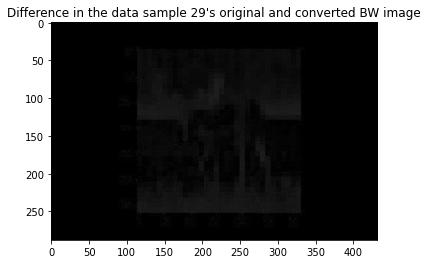

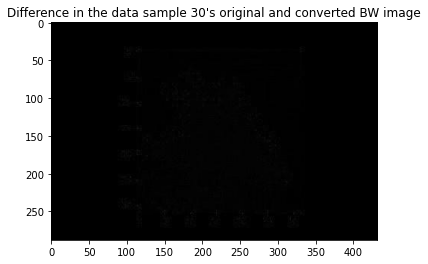

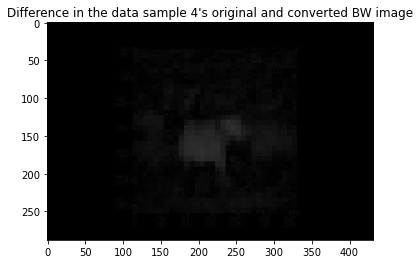

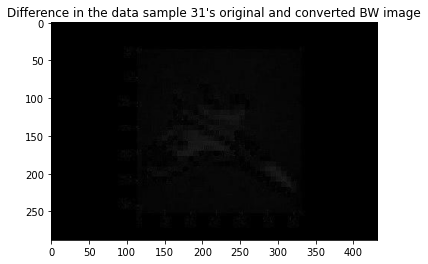

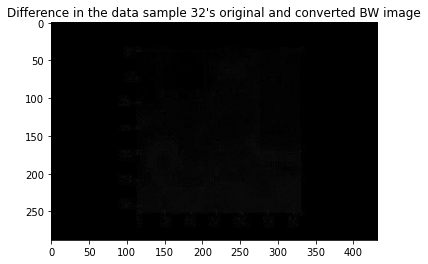

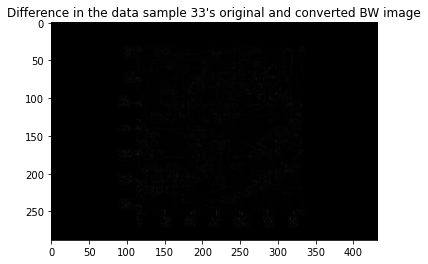

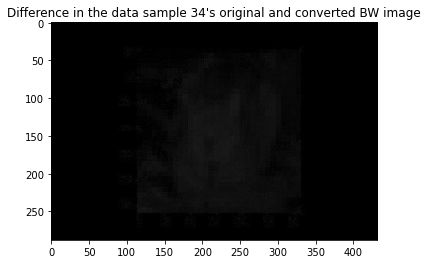

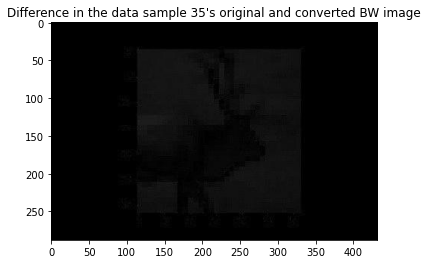

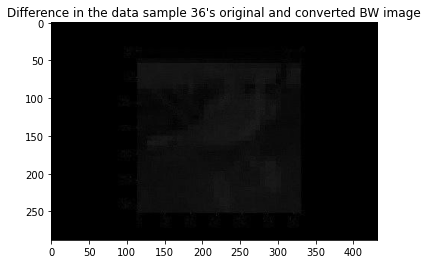

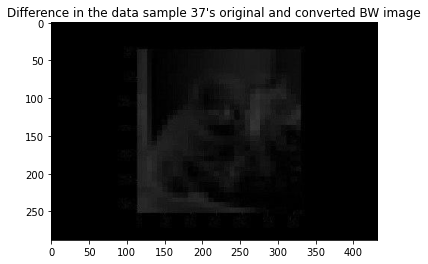

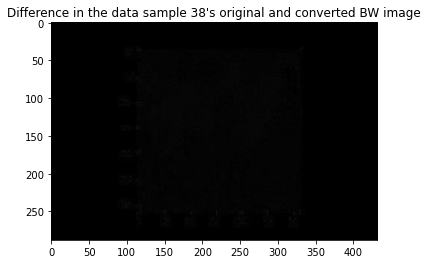

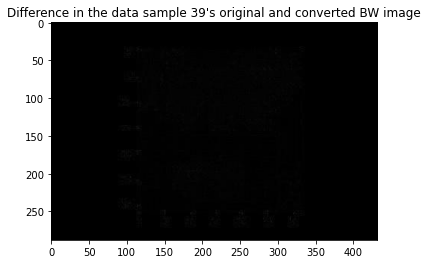

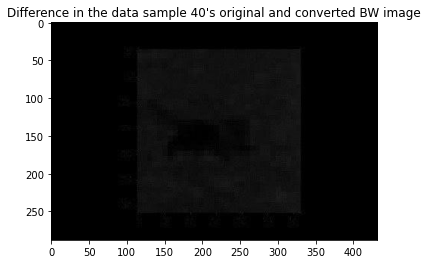

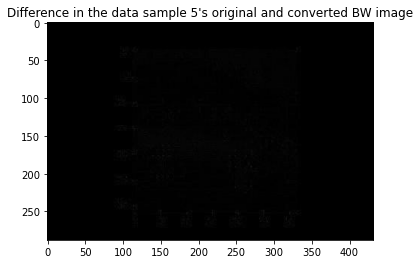

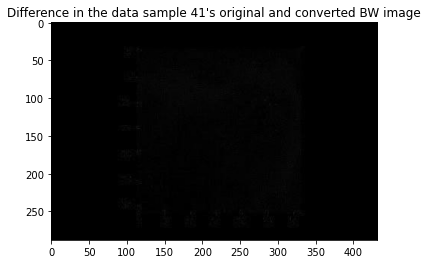

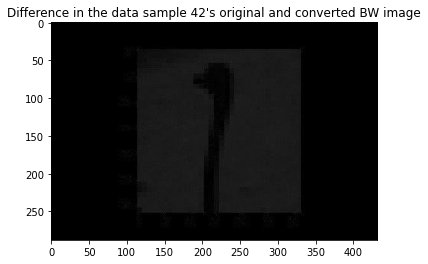

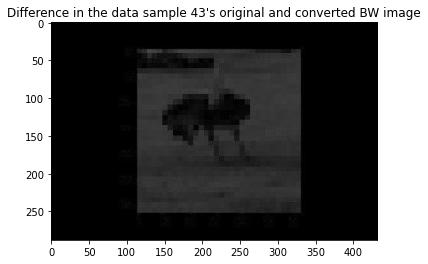

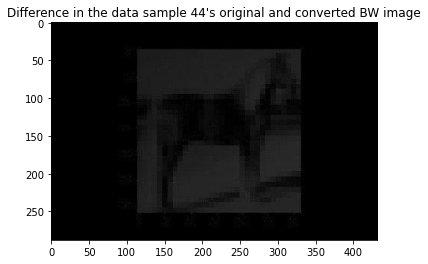

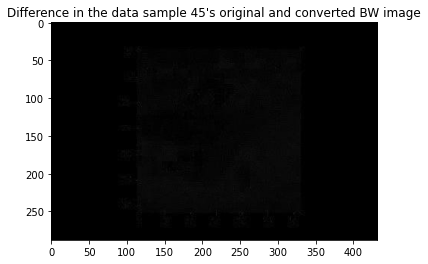

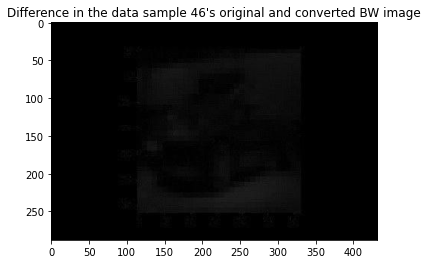

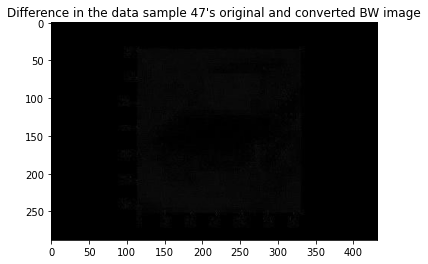

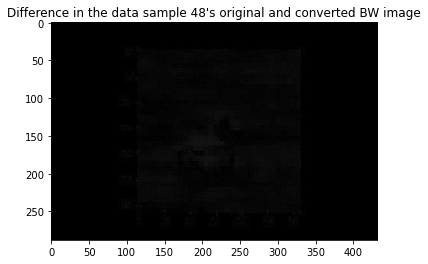

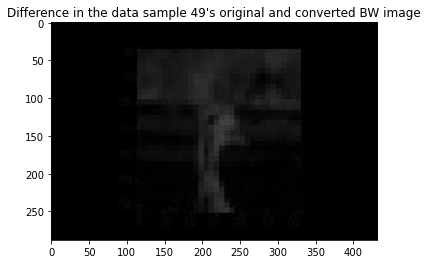

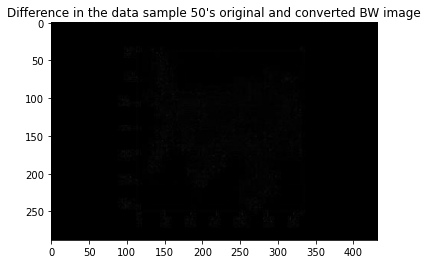

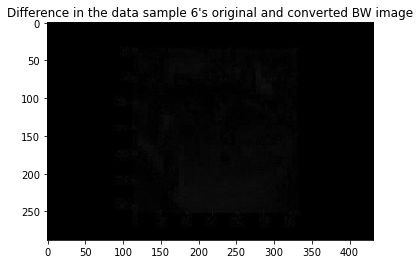

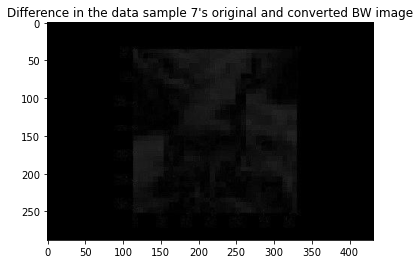

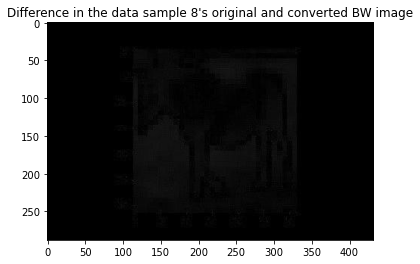

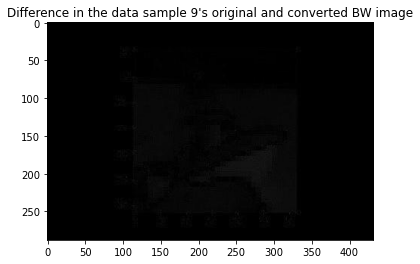

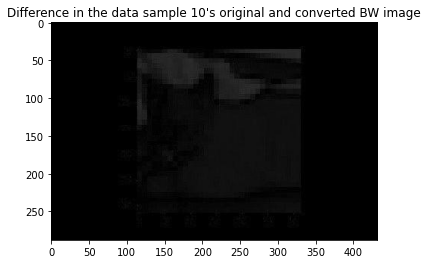

In [395]:
for img in images:
    img_arr=cv2.imread(os.path.join(path,img))
    plt.figure()
    plt.imshow(img_arr)
    plt.title('Difference in the data sample '+str(int(re.findall(r'\d+', img)[0])+1)+ "'s original and converted BW image")

From the diagram plotted above, we can see that there are 34 data samples with difference reflected from the original input dataset versus the one that was converted to gray scale. The data sample number is listed as shown below<br>

<b>34 data samples with difference: </b><br>
3,4,7,8,10<br>
11,13,14,15,16,18,19,20<br>
21,22,23,24,25,26,27,28,29<br>
31,34,36,37,38,40<br>
42,43,44,46,49,50<br>

<b>16 data samples with no difference:</b><br>
1,2,5,6,9,12,17,40,32,33,35,39,41,45,47,48<br>

